In [1]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 195 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=9f6077a0e5c22851942a5ba9e4f5a22c052f0e62b78c0a695d695d84a61a0dc4
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# raw data 바꿔가면서 분석
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터.csv', index_col = 0, encoding = 'cp949')
raw_data = raw_data.drop("REFYM", axis = 1)

# 분석에 이용할 컬럼 바꾸고 싶으면 meaning list 수정
meaning_list_app = raw_data.columns.tolist()[48:]
raw_data["유동인구"] = raw_data["승차인원"]+raw_data["하차인원"]

meaning_list = ['유동인구','FAR', 'RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT','단독주택','공동주택','제1종근린생활시설','제2종근린생활시설','업무시설','의료시설','노유자시설','종교시설','교육연구시설','자동차관련시설','창고시설','문화및집회시설','공장','위험물저장및처리시설','동.식물관련시설','판매시설','숙박시설','운동시설','분뇨.쓰레기처리시설','자원순환관련시설','근린생활시설','방송통신시설','교육연구및복지시설','운수시설','판매및영업시설','위락시설','교정및군사시설','수련시설',
 '장례시설','발전시설','공공용시설','관광휴게시설','야영장시설','묘지관련시설','다세대주택']
data= raw_data.loc[:, meaning_list]
data = data.dropna(axis=0)




#클러스터링 포함
cl_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/클러스터데이터2.csv', index_col = 0, encoding = 'cp949')
data = data.loc[cl_data.index.tolist()]

In [4]:
data.shape

(238, 42)

In [5]:
cl_data.shape

(238, 7)

In [6]:
data.head()

유동인구        FAR  RESDT_AREA_RT  COMRC_AREA_RT  MIXBLDG_AREA_RT  \
가능역    704218.0  14.190705          0.713          0.099            0.189   
가양역   2143208.0  33.729441          0.801          0.179            0.011   
가오리역   436890.0  22.184693          0.763          0.104            0.131   
가좌역    553710.0  68.357480          0.759          0.096            0.060   
간석역    619264.0  37.203943          0.687          0.238            0.061   

      INDST_AREA_RT  ETC_AREA_RT    단독주택    공동주택  제1종근린생활시설  ...  위락시설  \
가능역           0.000        0.000  1637.0   294.0      246.0  ...   0.0   
가양역           0.009        0.000     1.0   214.0       25.0  ...   0.0   
가오리역          0.000        0.001  1255.0   759.0      251.0  ...   0.0   
가좌역           0.000        0.084   688.0  1003.0      197.0  ...   0.0   
간석역           0.011        0.003   390.0   595.0      107.0  ...   0.0   

      교정및군사시설  수련시설  장례시설  발전시설  공공용시설  관광휴게시설  야영장시설  묘지관련시설  다세대주택  
가능역       0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
가양역       0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
가오리역      0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
가좌역       0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
간석역       0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  

[5 rows x 42 columns]

In [7]:
data.describe()

유동인구         FAR  RESDT_AREA_RT  COMRC_AREA_RT  \
count  2.380000e+02  238.000000     238.000000     238.000000   
mean   1.328195e+06   33.454779       0.684592       0.158214   
std    1.067641e+06   48.871465       0.118127       0.083693   
min    1.469900e+05    2.895013       0.382000       0.003000   
25%    6.486825e+05   17.714128       0.608000       0.095250   
50%    1.032961e+06   24.132816       0.671500       0.152000   
75%    1.624564e+06   33.862500       0.759000       0.218000   
max    6.824398e+06  582.459446       0.972000       0.385000   

       MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT         단독주택         공동주택  \
count       238.000000     238.000000   238.000000   238.000000   238.000000   
mean          0.078609       0.011794     0.066769   627.672269   386.466387   
std           0.055353       0.037478     0.103102   597.100457   293.662291   
min           0.000000       0.000000     0.000000     0.000000     0.000000   
25%           0.035000       0.000000     0.000000   155.750000   196.250000   
50%           0.074000       0.000000     0.002500   421.500000   310.000000   
75%           0.115750       0.000000     0.096250   974.750000   478.250000   
max           0.267000       0.252000     0.373000  3711.000000  1830.000000   

         제1종근린생활시설  ...        위락시설     교정및군사시설        수련시설        장례시설  \
count   238.000000  ...  238.000000  238.000000  238.000000  238.000000   
mean    141.470588  ...    0.592437    0.189076    0.201681    0.042017   
std     142.778240  ...    3.122983    1.299938    1.162565    0.272354   
min       1.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%      46.250000  ...    0.000000    0.000000    0.000000    0.000000   
50%     119.000000  ...    0.000000    0.000000    0.000000    0.000000   
75%     185.750000  ...    0.000000    0.000000    0.000000    0.000000   
max    1209.000000  ...   42.000000   14.000000   16.000000    3.000000   

             발전시설       공공용시설      관광휴게시설  야영장시설  묘지관련시설  다세대주택  
count  238.000000  238.000000  238.000000  238.0   238.0  238.0  
mean     0.004202    0.037815    0.142857    0.0     0.0    0.0  
std      0.064820    0.522327    1.025298    0.0     0.0    0.0  
min      0.000000    0.000000    0.000000    0.0     0.0    0.0  
25%      0.000000    0.000000    0.000000    0.0     0.0    0.0  
50%      0.000000    0.000000    0.000000    0.0     0.0    0.0  
75%      0.000000    0.000000    0.000000    0.0     0.0    0.0  
max      1.000000    8.000000   12.000000    0.0     0.0    0.0  

[8 rows x 42 columns]

In [8]:
lst = data.describe().loc['max']
col_list = lst[lst.values>100].index.tolist()
col_list = col_list + ['RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT']
col_list

['유동인구',
 'FAR',
 '단독주택',
 '공동주택',
 '제1종근린생활시설',
 '제2종근린생활시설',
 '업무시설',
 '종교시설',
 '교육연구시설',
 '공장',
 '판매시설',
 '숙박시설',
 '근린생활시설',
 'RESDT_AREA_RT',
 'COMRC_AREA_RT',
 'MIXBLDG_AREA_RT',
 'INDST_AREA_RT',
 'ETC_AREA_RT']

In [9]:
data= data.loc[:, col_list]
data = data.dropna(axis=0)
data

유동인구        FAR    단독주택    공동주택  제1종근린생활시설  제2종근린생활시설  업무시설  \
가능역          704218.0  14.190705  1637.0   294.0      246.0       83.0  37.0   
가양역         2143208.0  33.729441     1.0   214.0       25.0       24.0  40.0   
가오리역         436890.0  22.184693  1255.0   759.0      251.0      105.0   3.0   
가좌역          553710.0  68.357480   688.0  1003.0      197.0      222.0  17.0   
간석역          619264.0  37.203943   390.0   595.0      107.0      151.0  42.0   
...               ...        ...     ...     ...        ...        ...   ...   
화서역          822010.0  18.418809   165.0    80.0      145.0       19.0   1.0   
화정역         1862708.0  26.374676   198.0   120.0       38.0       62.0  12.0   
회룡역         1322138.0  17.742129    90.0   182.0       81.0       78.0   2.0   
효창공원앞역      1036642.0  27.553324  1189.0   747.0      302.0      325.0  35.0   
흑석(중앙대입구)역   854758.0  39.579673   847.0   264.0      283.0      131.0   1.0   

            종교시설  교육연구시설    공장  판매시설  숙박시설  근린생활시설  RESDT_AREA_RT  \
가능역         11.0     8.0   2.0   0.0   0.0     0.0          0.713   
가양역          5.0    40.0   7.0   4.0   0.0     0.0          0.801   
가오리역        13.0    13.0   0.0   6.0   0.0     6.0          0.763   
가좌역         15.0    37.0   5.0   0.0   3.0     2.0          0.759   
간석역          7.0    56.0   5.0   2.0   3.0     0.0          0.687   
...          ...     ...   ...   ...   ...     ...            ...   
화서역          5.0    33.0   0.0   0.0   0.0     0.0          0.515   
화정역          5.0    24.0   0.0   1.0   4.0     2.0          0.646   
회룡역          1.0     7.0   0.0   2.0   0.0     0.0          0.612   
효창공원앞역      18.0    69.0  13.0   1.0   2.0    22.0          0.713   
흑석(중앙대입구)역  25.0    61.0   0.0   2.0   0.0     0.0          0.555   

            COMRC_AREA_RT  MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT  
가능역                 0.099            0.189          0.000        0.000  
가양역                 0.179            0.011          0.009        0.000  
가오리역                0.104            0.131          0.000        0.001  
가좌역                 0.096            0.060          0.000        0.084  
간석역                 0.238            0.061          0.011        0.003  
...                   ...              ...            ...          ...  
화서역                 0.099            0.028          0.000        0.358  
화정역                 0.159            0.026          0.000        0.169  
회룡역                 0.157            0.120          0.036        0.074  
효창공원앞역              0.207            0.080          0.000        0.000  
흑석(중앙대입구)역          0.128            0.262          0.000        0.055  

[238 rows x 18 columns]

In [10]:
from sklearn.preprocessing import StandardScaler
scaled2 = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
scaled2.mean(axis=0)

유동인구               6.530724e-17
FAR               -1.268826e-16
단독주택              -1.100893e-16
공동주택              -2.985474e-17
제1종근린생활시설          5.597763e-18
제2종근린생활시설         -2.239105e-17
업무시설               7.090500e-17
종교시설               7.463684e-17
교육연구시설            -5.224579e-17
공장                -1.679329e-17
판매시설               2.239105e-17
숙박시설              -3.731842e-17
근린생활시설            -2.985474e-17
RESDT_AREA_RT      2.649608e-16
COMRC_AREA_RT     -1.054245e-16
MIXBLDG_AREA_RT   -1.753966e-16
INDST_AREA_RT      5.644411e-17
ETC_AREA_RT       -2.798882e-17
dtype: float64

In [11]:
scaled = scaled2.drop(['유동인구'], axis=1)


In [12]:
pca = PCA(random_state=312)
X_p = pca.fit_transform(scaled)

In [13]:
fa = FactorAnalyzer(n_factors=scaled.shape[1], rotation=None)
fa.fit(scaled)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [4.03701164e+00 1.97591440e+00 1.56042249e+00 1.50754235e+00
 1.42097839e+00 1.08699981e+00 9.77439221e-01 9.56138741e-01
 7.54234347e-01 6.75939596e-01 5.86318876e-01 4.20494839e-01
 3.37450704e-01 2.95710613e-01 2.12719440e-01 1.94675690e-01
 8.86165531e-06] 

적합한 PC 개수: 6


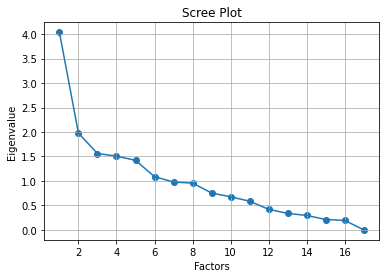

In [14]:
#Scatter plot
plt.scatter(range(1, scaled.shape[1]+1),ev)
plt.plot(range(1,scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [15]:
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio)

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum)

분산 설명 비율:
 [2.37471273e-01 1.16230259e-01 9.17895583e-02 8.86789618e-02
 8.35869641e-02 6.39411650e-02 5.74964248e-02 5.62434553e-02
 4.43667263e-02 3.97611527e-02 3.44893457e-02 2.47349905e-02
 1.98500414e-02 1.73947419e-02 1.25129082e-02 1.14515112e-02
 5.21273842e-07]
누적 분산 설명 비율:
 [0.23747127 0.35370153 0.44549109 0.53417005 0.61775702 0.68169818
 0.73919461 0.79543806 0.83980479 0.87956594 0.91405529 0.93879028
 0.95864032 0.97603506 0.98854797 0.99999948 1.        ]


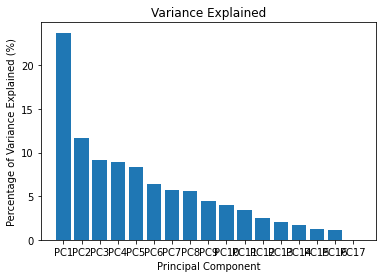

In [16]:
# 누적 분산비율 그래프
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [17]:
t = 6 #pc 개수 조정
pca = PCA(n_components=t,random_state=312)
x_p = pca.fit_transform(scaled)

In [18]:
pc_list = []
for i in range(0,t):
  pc_list.append(f"PC{i+1}")

pd.DataFrame(pca.components_.T, 
             columns = pc_list, 
             index=scaled.columns)

PC1       PC2       PC3       PC4       PC5       PC6
FAR              0.046478 -0.057331 -0.066710  0.546089  0.013526 -0.079399
단독주택             0.352820 -0.169360  0.131949 -0.045774 -0.218890 -0.187032
공동주택             0.238831 -0.171994  0.123201 -0.188567 -0.299554 -0.056081
제1종근린생활시설        0.403782 -0.085742  0.134658  0.055698 -0.131895  0.278426
제2종근린생활시설        0.432158  0.008577 -0.034335  0.081797  0.059087  0.027199
업무시설             0.316274  0.145011 -0.164006  0.110164  0.288030 -0.062640
종교시설             0.227115 -0.031375  0.189491  0.200669 -0.138648 -0.299413
교육연구시설           0.130069 -0.083688  0.081398  0.577462  0.246761 -0.066749
공장               0.024974  0.555724  0.385415  0.083133 -0.114579  0.000396
판매시설             0.069168  0.021776 -0.050624 -0.135698  0.307637 -0.057882
숙박시설             0.221387  0.073225 -0.293455  0.118466  0.101589 -0.026860
근린생활시설           0.205541 -0.124166  0.158265  0.006399 -0.104527  0.767610
RESDT_AREA_RT   -0.190268 -0.422716  0.447780  0.067745  0.269699 -0.010519
COMRC_AREA_RT    0.245030  0.253955 -0.228731 -0.260486  0.409515  0.144162
MIXBLDG_AREA_RT  0.296034 -0.002836  0.053938 -0.288224 -0.171269 -0.393767
INDST_AREA_RT   -0.057400  0.568679  0.349935  0.102601 -0.071662  0.037314
ETC_AREA_RT     -0.118952  0.073067 -0.483486  0.251061 -0.523722  0.092984

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.23747127, 0.35370153, 0.44549109, 0.53417005, 0.61775702,
       0.68169818])

In [20]:
pc_list = []
for i in range(0,t):
  app = f"PC{i+1}"
  pc_list.append(app)
print(pc_list)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [21]:
x_pp = pd.DataFrame(x_p, 
                    columns = pc_list, 
                    index = scaled.index)
x_pp
x_pp.to_csv(f'/content/drive/My Drive/Colab Notebooks/클러스터02주성분.csv', encoding = 'cp949')

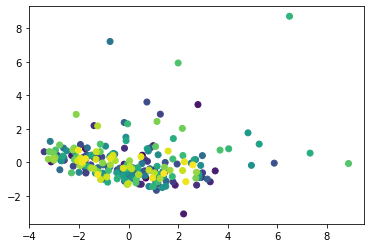

In [22]:
# 2차원 plot
plt.scatter(x=x_pp['PC1'],y=x_pp['PC4'], c = range(0,len(x_pp.index.tolist())))

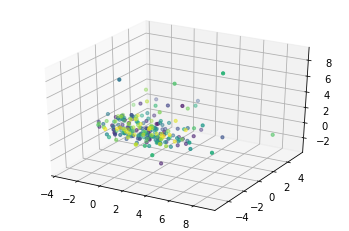

In [23]:
# 3차원 plot
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(x_pp['PC1'],x_pp['PC3'],x_pp['PC4'], s=10, c = range(0,len(x_pp.index.tolist())))
plt.show()

In [24]:
x_pp.describe()

PC1           PC2           PC3           PC4           PC5  \
count  2.380000e+02  2.380000e+02  2.380000e+02  2.380000e+02  2.380000e+02   
mean  -7.463684e-18 -7.277092e-17 -5.142945e-17  1.492737e-17 -1.492737e-17   
std    2.013466e+00  1.408635e+00  1.251801e+00  1.230408e+00  1.194560e+00   
min   -3.406501e+00 -2.813104e+00 -4.959028e+00 -3.083544e+00 -3.199627e+00   
25%   -1.463816e+00 -8.637993e-01 -6.977487e-01 -6.659287e-01 -8.224336e-01   
50%   -9.786279e-02 -2.395511e-01  6.510511e-02 -2.040063e-01  4.289382e-05   
75%    1.142839e+00  4.095682e-01  7.313949e-01  3.995926e-01  8.410918e-01   
max    8.881292e+00  1.067391e+01  5.411970e+00  8.732586e+00  5.098474e+00   

                PC6  
count  2.380000e+02  
mean  -3.731842e-18  
std    1.044790e+00  
min   -3.341404e+00  
25%   -5.017325e-01  
50%   -2.373718e-02  
75%    3.888281e-01  
max    1.188300e+01

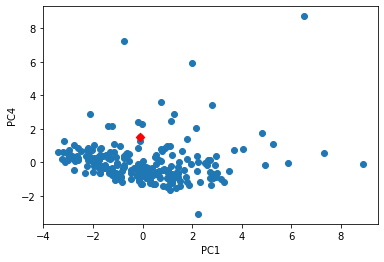

In [25]:
# Principal Component Pattern Plot 1
plt.scatter(x=x_pp['PC1'],y=x_pp['PC4'])
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.scatter(x=x_pp.iloc[118,0], y=x_pp.iloc[118,3], marker='D', c='r')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
train_dataset, test_dataset = train_test_split(scaled2, train_size=0.7, test_size=0.3, random_state=312)
train_y = train_dataset[['유동인구']]
test_y = test_dataset[['유동인구']]
train = train_dataset.drop(['유동인구'], axis=1)
test = test_dataset.drop(['유동인구'], axis=1)

In [28]:
#scale_train = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns, index = train.index)
#scale_test = pd.DataFrame(StandardScaler().fit_transform(test), columns=test.columns, index = test.index)

pca = PCA(n_components = t)
pdComp1 = pca.fit_transform(train)
pdComp2 = pca.fit_transform(test)
train_p = pd.DataFrame(data = pdComp1, columns = pc_list)
test_p = pd.DataFrame(data = pdComp2, columns = pc_list)

In [29]:
#scale the training and testing data
X_nopca_train = scale(train)
X_nopca_test = scale(test)

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_nopca_train[:,:], train_y)

#calculate RMSE
pred1 = regr.predict(X_nopca_test)
np.sqrt(mean_squared_error(test_y, pred1))


2.817254299219768

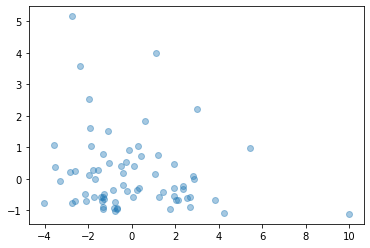

R2 =  -4.6710794734211465


In [30]:
plt.scatter(pred1, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred1)
print('R2 = ', r2)

In [31]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(train))
X_reduced_test = pca.transform(scale(test))[:,:]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:], train_y)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(test_y, pred))


1.0000112104829562

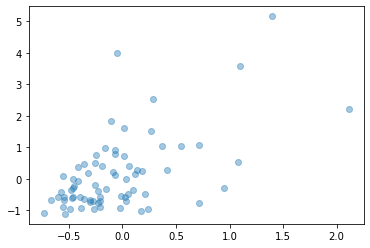

R2 =  0.28546522470720903


In [32]:
plt.scatter(pred, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred)
print('R2 = ', r2)

In [33]:
regr.coef_

array([[ 0.21036143,  0.03433776, -0.03964103, -0.03756033,  0.11745588,
         0.12762176]])

In [34]:
regr.intercept_

array([-0.05445088])

In [35]:
train_y_prime = train_y.reset_index()
merge_df = pd.concat([train_p, train_y_prime], axis = 1)
merge_df = merge_df.set_index('index')
print(merge_df)

                  PC1       PC2       PC3       PC4       PC5       PC6  \
index                                                                     
동대입구역       -0.171542 -1.739321  1.430520  0.963078  1.091505 -1.288475   
선정릉역         0.824200 -2.018805  2.180117  0.603624  0.827734 -1.488177   
명일역         -0.921006 -0.355254 -1.652009  0.924144 -1.222549  1.083054   
노들역         -1.832252  0.492031 -1.586235  0.092961 -0.050594  0.021301   
흑석(중앙대입구)역   1.470579  0.360453  0.181270 -1.835475 -1.282376  0.019444   
...               ...       ...       ...       ...       ...       ...   
한성대입구(삼선교)역  1.560199  1.052121 -1.698154 -0.361509 -1.037491 -0.478540   
소사역          0.567406  0.692419  0.745153 -0.381261  0.374702 -0.431331   
창신역         -1.345001  1.440967 -1.904142  1.233180 -1.603644 -0.532895   
광흥창(서강)역    -0.300831 -0.109897 -0.208945 -0.178878 -0.306210 -0.107014   
안암(고대병원앞)역  -0.238030  1.398618 -1.209265  1.669288 -1.085222 -1.281254   

                 유동인구  


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
ols('유동인구 ~ PC1', data=merge_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   유동인구   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     42.22
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           9.35e-10
Time:                        03:46:21   Log-Likelihood:                -199.74
No. Observations:                 166   AIC:                             403.5
Df Residuals:                     164   BIC:                             409.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0545      0.063     -0.865      0.388      -0.179       0.070
PC1            0.2101      0.032      6.498      0.000       0.146       0.274
==============================================================================
Omnibus:                       93.298   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.773
Skew:                           2.085   Prob(JB):                    1.81e-109
Kurtosis:                      10.416   Cond. No.                         1.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model = ols('유동인구 ~ PC1', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df      sum_sq    mean_sq          F        PR(>F)
PC1         1.0   27.762973  27.762973  42.219964  9.347737e-10
Residual  164.0  107.842998   0.657579        NaN           NaN

In [39]:
print('{:.20f}'.format(sm.stats.anova_lm(model, typ=1)['PR(>F)'][0]))

0.00000000093477374193


In [40]:
model = ols('유동인구 ~ PC1+PC2+PC3+PC4+PC5+PC6', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df      sum_sq    mean_sq          F        PR(>F)
PC1         1.0   27.762973  27.762973  44.080490  4.725802e-10
PC2         1.0    0.027439   0.027439   0.043567  8.349292e-01
PC3         1.0    1.836617   1.836617   2.916077  8.965260e-02
PC4         1.0    3.072642   3.072642   4.878569  2.862256e-02
PC5         1.0    1.576995   1.576995   2.503865  1.155544e-01
PC6         1.0    1.187209   1.187209   1.884984  1.717020e-01
Residual  159.0  100.142095   0.629824        NaN           NaN

In [41]:
variables = sm.stats.anova_lm(model, typ=1).index.tolist()
pvalues = sm.stats.anova_lm(model, typ=1)['PR(>F)'].tolist()

for variable, pvalue in zip(variables, pvalues):
    
    print(variable, '\t', '{:.20f}'.format(pvalue))

PC1 	 0.00000000047258016747
PC2 	 0.83492916122487392805
PC3 	 0.08965259675965615849
PC4 	 0.02862255572587676933
PC5 	 0.11555442625951581337
PC6 	 0.17170198265695144069
Residual 	 nan
